几种任务

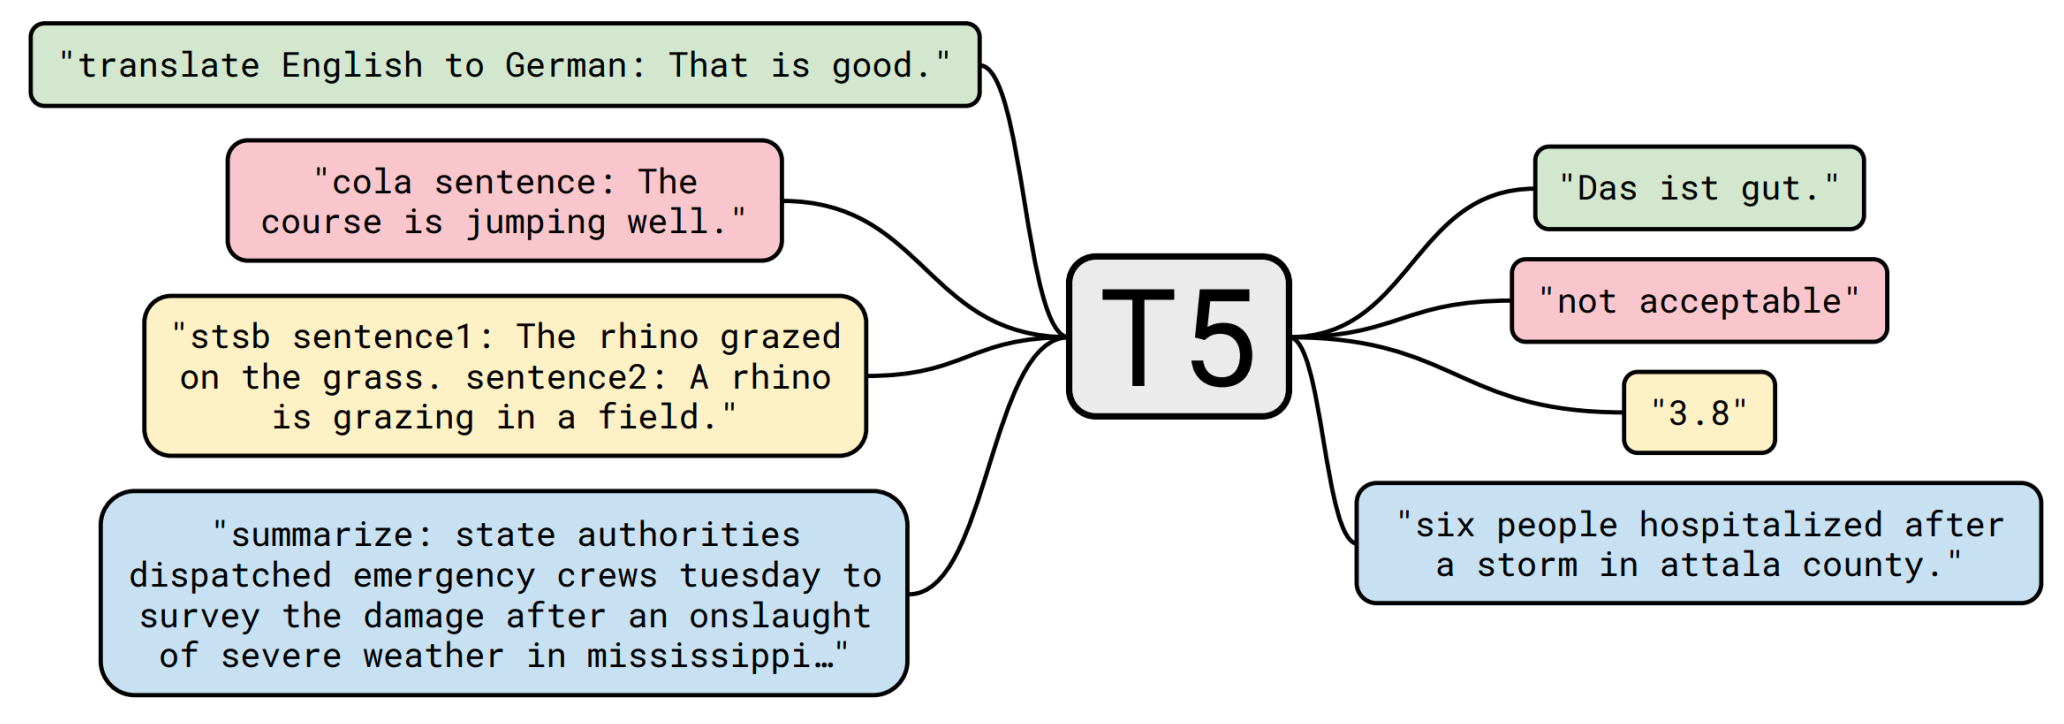

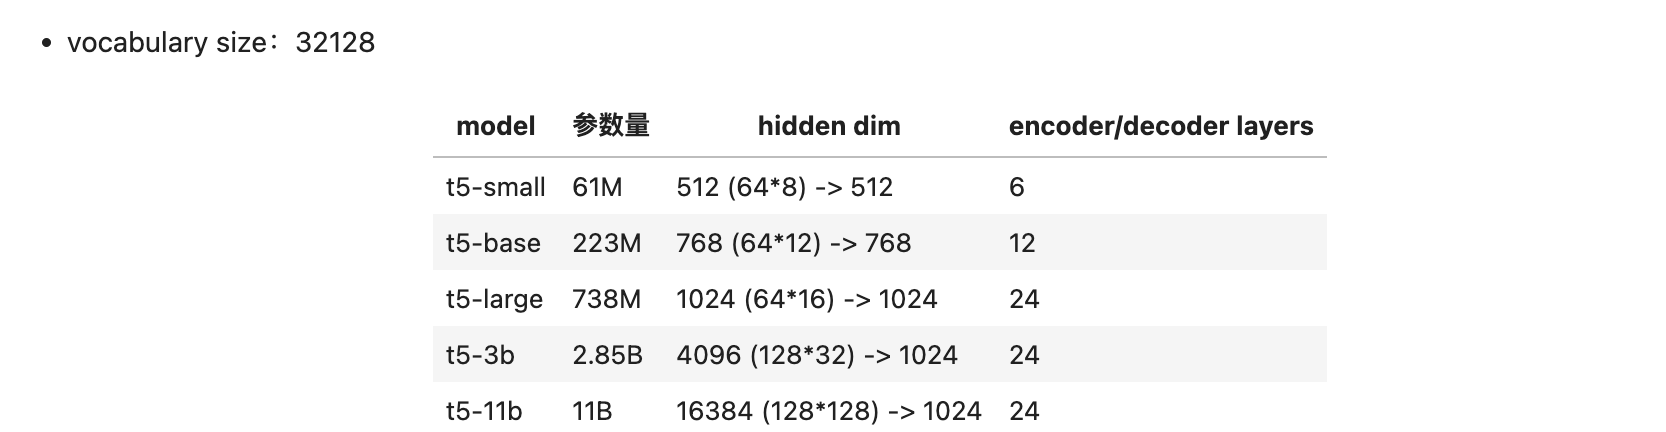

In [ ]:
T5Model(
  (shared): Embedding(32128, 1024)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
     (1-23): 23 x T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (final_layer_norm): T5LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
   (decoder): T5Stack(
    (embed_tokens): Embedding(32128, 1024)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 32)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerCrossAttention(
            (EncDecAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (2): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
       (1-23): 23 x T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerCrossAttention(
            (EncDecAttention): T5Attention(
              (q): Linear(in_features=1024, out_features=4096, bias=False)
              (k): Linear(in_features=1024, out_features=4096, bias=False)
              (v): Linear(in_features=1024, out_features=4096, bias=False)
              (o): Linear(in_features=4096, out_features=1024, bias=False)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (2): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=1024, out_features=16384, bias=False)
              (wo): Linear(in_features=16384, out_features=1024, bias=False)
              (dropout): Dropout(p=0.1, inplace=False)
              (act): ReLU()
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (final_layer_norm): T5LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
)


In [ ]:
model.eval()
# forward pass
outputs = model(input_ids=input_ids, decoder_input_ids=decoder_input_ids)
last_hidden_states = outputs.last_hidden_state
# 手动前向传播
def t5_forward(model, input_ids, decoder_input_ids):
    encoder_outputs = model.encoder(input_ids=input_ids)
#     print(encoder_outputs)
    hidden_states = encoder_outputs[0]
    decoder_outputs = model.decoder(input_ids=decoder_input_ids, 
                                    encoder_hidden_states=hidden_states,)
    return decoder_outputs.last_hidden_state

In [ ]:
##

In [ ]:
# 1.Unsupervised denoising training
# 无监督微调
# mlm
input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids

# the forward function automatically creates the correct decoder_input_ids
loss = model(input_ids=input_ids, labels=labels).loss
loss.item()


# 2.Supervised training
# seq2seq
input_ids = tokenizer("translate English to German: The house is wonderful.", return_tensors="pt").input_ids
labels = tokenizer("Das Haus ist wunderbar.", return_tensors="pt").input_ids

# the forward function automatically creates the correct decoder_input_ids
loss = model(input_ids=input_ids, labels=labels).loss
loss.item()

# 3.multi sentence pairs
# the following 2 hyperparameters are task-specific
max_source_length = 512
max_target_length = 128

# Suppose we have the following 2 training examples:
input_sequence_1 = "Welcome to NYC"
output_sequence_1 = "Bienvenue à NYC"

input_sequence_2 = "HuggingFace is a company"
output_sequence_2 = "HuggingFace est une entreprise"

# encode the inputs
task_prefix = "translate English to French: "
input_sequences = [input_sequence_1, input_sequence_2]

encoding = tokenizer(
    [task_prefix + sequence for sequence in input_sequences],
    padding="longest",
    max_length=max_source_length,
    truncation=True,
    return_tensors="pt",
)

input_ids, attention_mask = encoding.input_ids, encoding.attention_mask

# encode the targets
target_encoding = tokenizer(
    [output_sequence_1, output_sequence_2],
    padding="longest",
    max_length=max_target_length,
    truncation=True,
    return_tensors="pt",
)
labels = target_encoding.input_ids

# replace padding token id's of the labels by -100 so it's ignored by the loss
labels[labels == tokenizer.pad_token_id] = -100 # ！！！！ 重要，微调的时候一定要记得label处理

# forward pass
loss = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels).loss
loss.item()

## 完成任务

In [ ]:
# inference
input_ids = tokenizer(
    "summarize: Transfer learning, where a model is first pre-trained on a data-rich task before being fine-tuned on a downstream task, has emerged as a powerful technique in natural language processing (NLP). The effectiveness of transfer learning has given rise to a diversity of approaches, methodology, and practice. In this paper, we explore the landscape of transfer learning techniques for NLP by introducing a unified framework that converts every language problem into a text-to-text format. Our systematic study compares pretraining objectives, architectures, unlabeled datasets, transfer approaches, and other factors on dozens of language understanding tasks. By combining the insights from our exploration with scale and our new “Colossal Clean Crawled Corpus”, we achieve state-of-the-art results on many benchmarks covering summarization, question answering, text classification, and more. To facilitate future work on transfer learning for NLP, we release our dataset, pre-trained models, and code.", 
    return_tensors="pt"
).input_ids  # Batch size 1
outputs = model.generate(input_ids, max_length=128)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.